<a href="https://colab.research.google.com/github/Dianevera/AI-classification/blob/main/Classification_of_dog_and_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  i

In [4]:
# Variables for pre-processing and training.
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
# 3
# Train image generator
train_image_generator = ImageDataGenerator(
        rescale=1./255)


# Validation train generator
validation_image_generator = ImageDataGenerator(
        rescale=1./255)

# Test image generator
test_image_generator = ImageDataGenerator(
        rescale=1./255)

train_data_gen = train_generator = train_image_generator.flow_from_directory(
        train_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH ),
        batch_size=batch_size,
        class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
        validation_dir,
        target_size=(IMG_HEIGHT, IMG_HEIGHT),
        batch_size=batch_size,
        class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
        directory=PATH,
        target_size=(IMG_HEIGHT, IMG_HEIGHT),
        batch_size=batch_size,
        shuffle = False,
        classes=['test'])



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


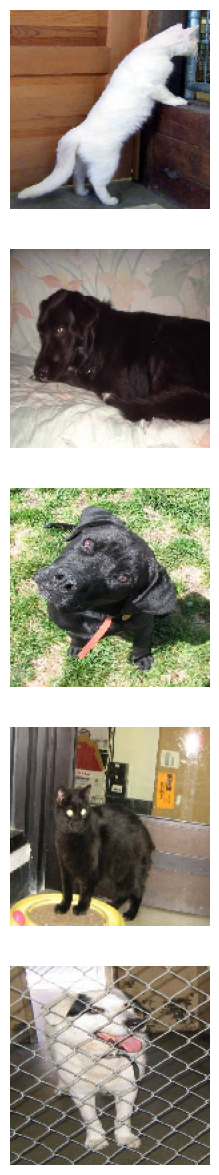

In [6]:

# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [7]:
# 5
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.3,
        rotation_range=0.3,
        horizontal_flip=True)

Found 2000 images belonging to 2 classes.


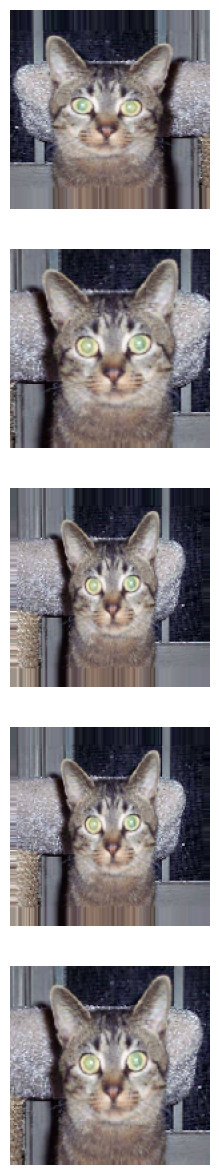

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [9]:
epochs = 20

In [16]:
# 7
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(16, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 conv2d_14 (Conv2D)          (None, 146, 146, 16)      2320      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 35, 35, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 33, 33, 64)       

In [17]:
# 8
history = model.fit(train_data_gen, validation_data = val_data_gen, epochs=epochs)

Epoch 1/20
16/16 [==============================] - 26s 1s/step - loss: 0.7389 - accuracy: 0.5065 - val_loss: 0.6777 - val_accuracy: 0.5440
Epoch 2/20
16/16 [==============================] - 17s 1s/step - loss: 0.6792 - accuracy: 0.5775 - val_loss: 0.6679 - val_accuracy: 0.5960
Epoch 3/20
16/16 [==============================] - 18s 1s/step - loss: 0.6678 - accuracy: 0.5955 - val_loss: 0.6516 - val_accuracy: 0.6200
Epoch 4/20
16/16 [==============================] - 17s 1s/step - loss: 0.6561 - accuracy: 0.6170 - val_loss: 0.6261 - val_accuracy: 0.6550
Epoch 5/20
16/16 [==============================] - 18s 1s/step - loss: 0.6509 - accuracy: 0.6205 - val_loss: 0.6566 - val_accuracy: 0.5980
Epoch 6/20
16/16 [==============================] - 17s 1s/step - loss: 0.6394 - accuracy: 0.6485 - val_loss: 0.6075 - val_accuracy: 0.6810
Epoch 7/20
16/16 [==============================] - 17s 1s/step - loss: 0.6224 - accuracy: 0.6545 - val_loss: 0.6078 - val_accuracy: 0.6580
Epoch 8/20
16/16 [==

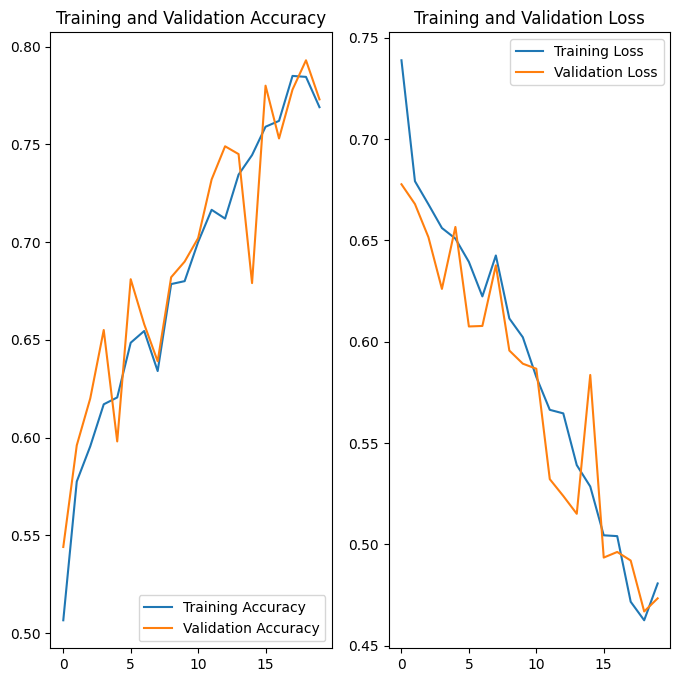

In [18]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
probabilities = model.predict(test_data_gen).flatten()

1/1 [==============================] - 1s 815ms/step


In [20]:

# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 82.0% of the images of cats and dogs.
You passed the challenge!
